# Geometric Transformations of Images
In this [course](https://github.com/Nhan121/Some-statistical-GANs-simulations-drafts-/tree/master/Image_processing%20%26%20computer_vision/Image%20processing/Chapter2), you will learn to apply different geometric transformation to images like `translation`, `rotation`, `affine transformation`, etc.
### Transformations
`OpenCV` provides two transformation functions, `cv2.warpAffine` and `cv2.warpPerspective`, with which you can have all kinds of transformations. 
- `cv2.warpAffine` takes a 2x3 transformation matrix while 
- `cv2.warpPerspective` takes a 3x3 transformation matrix as input.

And in this kernel, we only focus on the first Section: `translation`.

In [1]:
import cv2
import numpy as np
import skimage.io as si
import skimage.color as sc
import matplotlib.pyplot as plt

### 1. Mathematics idea.

Translation is the shifting of object’s location. If you know the shift in $(x,y)$ direction, let it be $(t_x,t_y)$, 

$$ (x, y) \mapsto (x + t_x, y + t_y) $$

and, since your image is stored as an `3D array` (3 `2D-matrix` corresponding to 3 channels) so you can create the `transformation matrix` $\textbf{M}$ as follows:

$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y  \end{bmatrix}$$

You can easy to prove that

                            output[t_y :, t_x :, :] = input[ : -t_y, : - t_x, :] 
## 2. Illustration example
Noting that the `original point coordinate (0, 0)` in `OpenCV` is the `top-left-corner`
### Example 1.

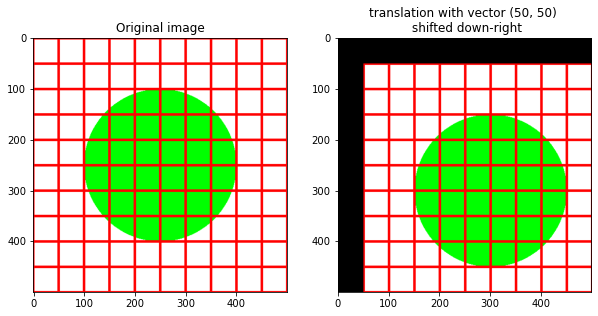

In [2]:
black = np.zeros((500, 500, 3), dtype = np.uint8)
image = black.copy()
image[:,:,0] = 255
image[:,:,1] = 255
image[:,:,2] = 255
image = cv2.circle(image, (250, 250), 150, (0, 255, 0), -1)
for k in range(0, 501, 50):
    image = cv2.line(image, (k, 0), (k,500), (255, 0, 0), 3)
    image = cv2.line(image, (500-k, 0), (500-k, 500), (255, 0, 0), 3)
    image = cv2.line(image, (0, 500-k), (500, 500-k), (255, 0, 0), 3)
    image = cv2.line(image, (0, k), (500, k), (255, 0, 0), 3)

## translate with vector a = (50, 50)
Ma = np.float32([[1, 0, 50],[0, 1, 50]])
a_trans_img = cv2.warpAffine(image, Ma, image.shape[:2]) 
plt.figure(figsize = (10, 6))
plt.subplot(121); plt.imshow(image); plt.title('Original image')
plt.subplot(122); plt.imshow(a_trans_img); plt.title('translation with vector (50, 50) \n shifted down-right')
plt.show()

#### Example 2.

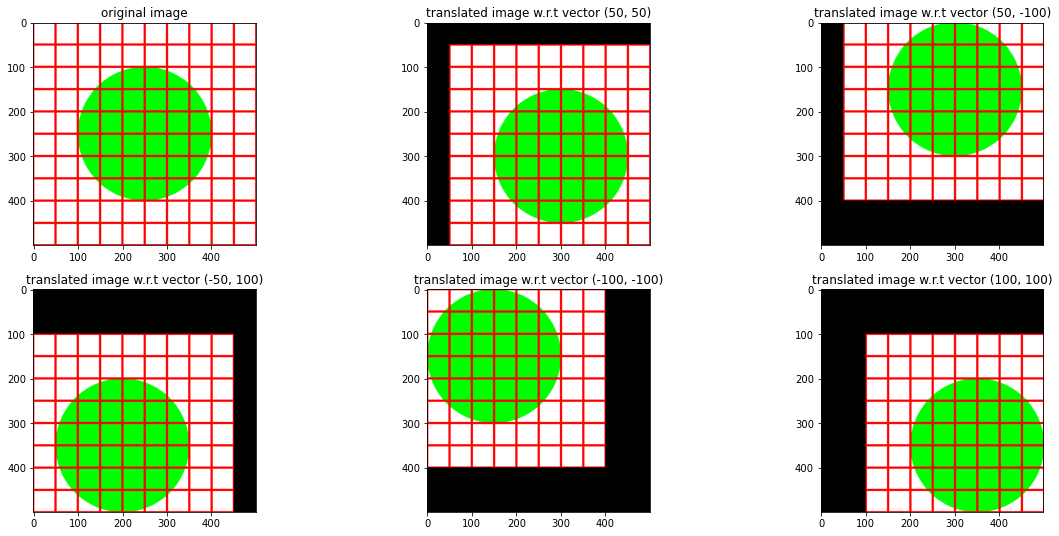

In [3]:
## translate with vector b = (50, -100)
Mb = np.float32([[1, 0, 50],[0, 1, -100]])
b_trans_img = cv2.warpAffine(image, Mb, image.shape[:2]) 

## translate with vector c = (-50, 100)
Mc = np.float32([[1, 0, -50],[0, 1, 100]])
c_trans_img = cv2.warpAffine(image, Mc, image.shape[:2]) 

## translate with vector d = (-100, -100)
Md = np.float32([[1, 0, -100],[0, 1, -100]])
d_trans_img = cv2.warpAffine(image, Md, image.shape[:2])

## translate with vector e = (100, 100)
Me = np.float32([[1, 0, 100],[0, 1, 100]])
e_trans_img = cv2.warpAffine(image, Me, image.shape[:2])

## display
images = [image, a_trans_img, b_trans_img, c_trans_img, d_trans_img, e_trans_img]
titles = ['original image', 
          'translated image w.r.t vector (50, 50)', 
          'translated image w.r.t vector (50, -100)',
          'translated image w.r.t vector (-50, 100)',
          'translated image w.r.t vector (-100, -100)',
          'translated image w.r.t vector (100, 100)']
plt.figure(figsize = (20, 9))
for k in range(6):
    plt.subplot(2, 3, k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    #plt.axis("off")

### 3. EXERCISEs
#### Exercise 1. Circle around the corners.
$\qquad$ In this exercise, you will be asked to generate the 8 movements of the circle in `image` with the following `shifted_direction`:

$$ (\pm 100, \pm 100), (0, \pm 100), (\pm 100, 0) $$

In the centers, this must be the orginal images.

**Step 1.** Create 8 images of `movements_translation` without loops.

**SOLUTION**

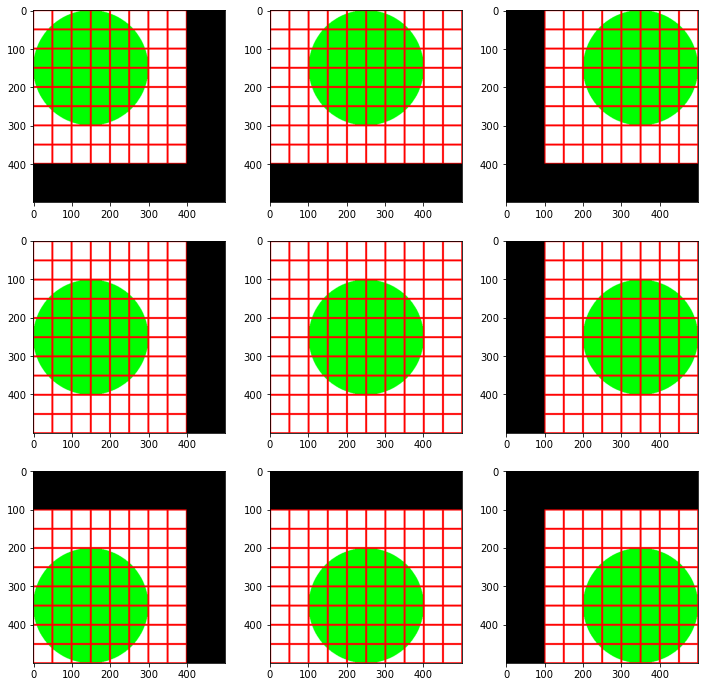

In [4]:
shape = image.shape[:2]
img_11 = cv2.warpAffine(image, np.float32([[1, 0, -100],[0, 1, -100]]), shape)
img_12 = cv2.warpAffine(image, np.float32([[1, 0, 0],[0, 1, -100]]), shape)
img_13 = cv2.warpAffine(image, np.float32([[1, 0, 100],[0, 1, -100]]), shape)
img_21 = cv2.warpAffine(image, np.float32([[1, 0, -100],[0, 1, 0]]), shape)
img_22 = cv2.warpAffine(image, np.float32([[1, 0, 0],[0, 1, 0]]), shape)
img_23 = cv2.warpAffine(image, np.float32([[1, 0, 100],[0, 1, 0]]), shape)
img_31 = cv2.warpAffine(image, np.float32([[1, 0, -100],[0, 1, 100]]), shape)
img_32 = cv2.warpAffine(image, np.float32([[1, 0, 0],[0, 1, 100]]), shape)
img_33 = cv2.warpAffine(image, np.float32([[1, 0, 100],[0, 1, 100]]), shape)

images = [img_11, img_12, img_13, img_21, img_22, img_23, img_31, img_32, img_33]
plt.figure(figsize = (12, 12))
for k in range(9):
    plt.subplot(3,3,k+1), plt.imshow(images[k])

**Step 2.** Using loop to generate & display all the movements.

**SOLUTION.**

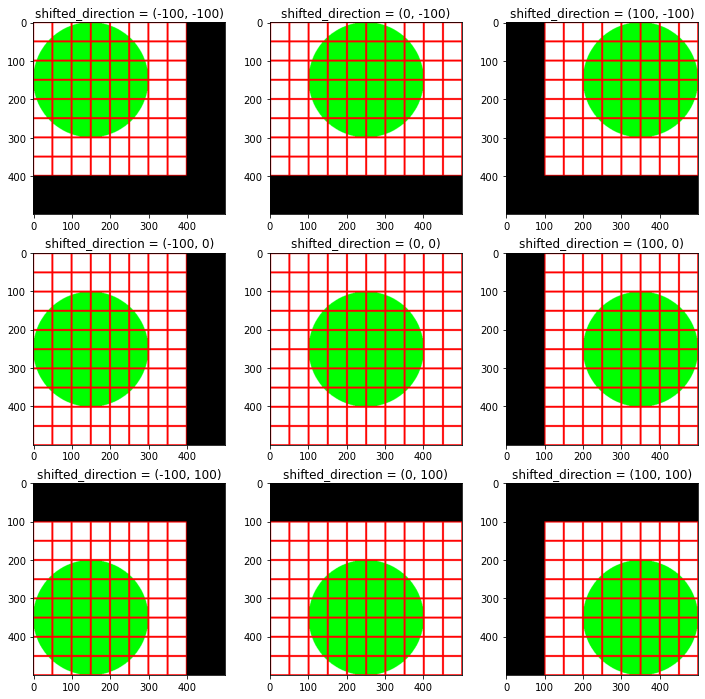

In [5]:
plt.figure(figsize = (12, 12))
for idy in range(3):
    for idx in range(3):
        t_x = (idx - 1)*100
        t_y = (idy - 1)*100
        image_xy = cv2.warpAffine(image, np.float32([[1, 0, t_x],[0, 1, t_y]]), shape)
        plt.subplot(3,3,(idy)*3 + idx + 1)
        plt.imshow(image_xy)
        plt.title('shifted_direction = (%s, %s)'%(t_x, t_y))

#### Exercise 2. Insert the `blue_circle_movements` in any `image_movements`
Firstly, look at the following image

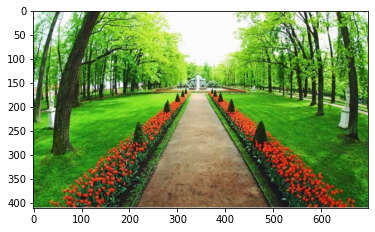

In [6]:
img = si.imread(r"/kaggle/input/nhan-121/mang.JPG")
plt.imshow(img);

**Step 1**.

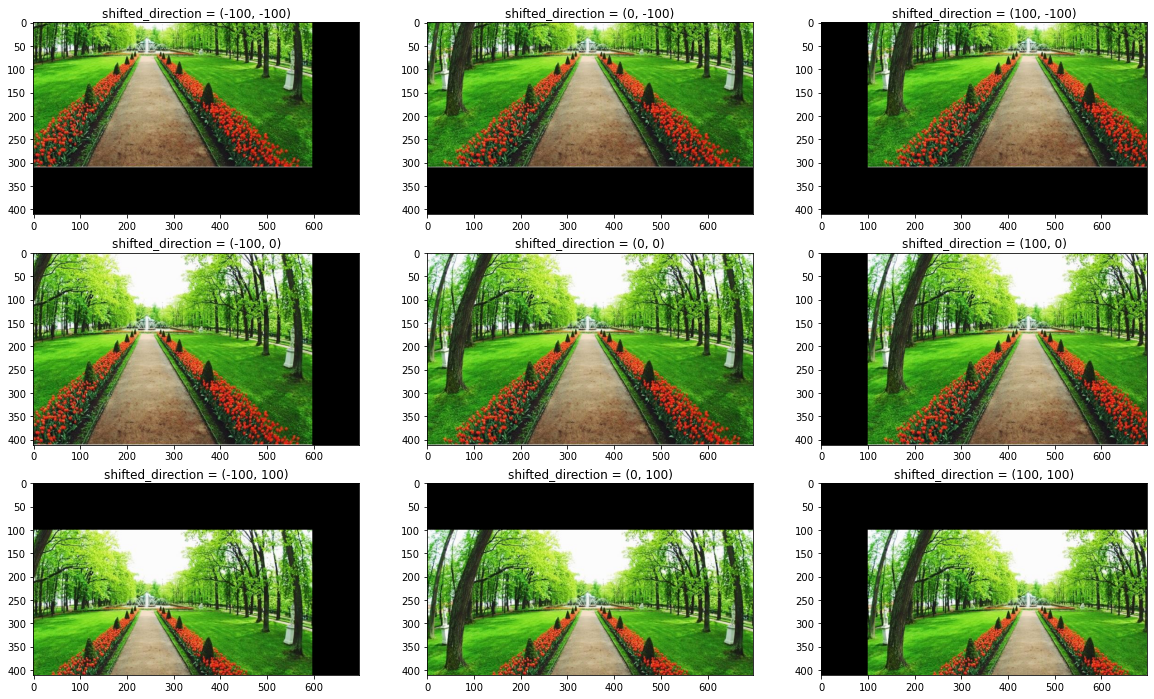

In [7]:
plt.figure(figsize = (20, 12))
w, h = img.shape[:2]
for idy in range(3):
    for idx in range(3):
        t_x = (idx - 1)*100
        t_y = (idy - 1)*100
        image_xy = cv2.warpAffine(img, np.float32([[1, 0, t_x],[0, 1, t_y]]), (h, w))
        plt.subplot(3,3,(idy)*3 + idx + 1)
        plt.imshow(image_xy)
        plt.title('shifted_direction = (%s, %s)'%(t_x, t_y))

**Step 2.** Add the `blue circle` at each corner of the directions; this circle play the roles as the `cursor`

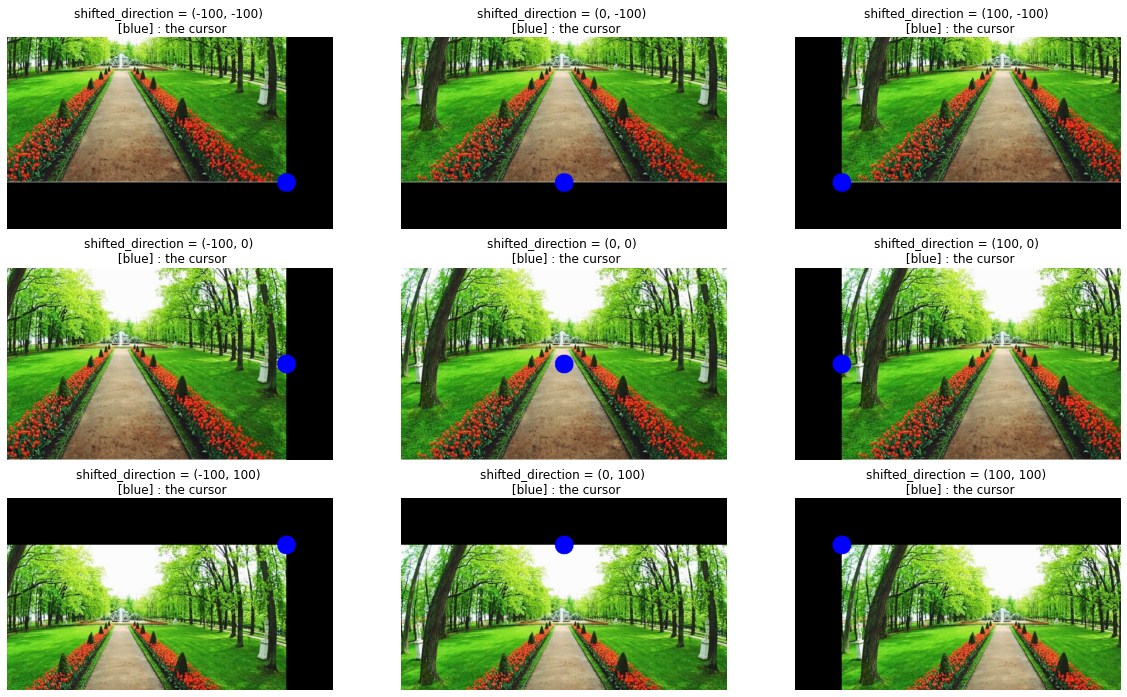

In [8]:
x_cen = [h-100, h//2, 100]
y_cen = [w-100, w//2, 100]
plt.figure(figsize = (20, 12))
for idy in range(3):
    for idx in range(3):
        t_x = (idx - 1)*100
        t_y = (idy - 1)*100
        image_xy = cv2.warpAffine(img, np.float32([[1, 0, t_x],[0, 1, t_y]]), (h, w))
        cir_img = cv2.circle(image_xy, (x_cen[idx], y_cen[idy]), 20, (0,0,255), -1)
        plt.subplot(3,3,(idy)*3 + idx + 1)
        plt.imshow(cir_img)
        plt.title('shifted_direction = (%s, %s) \n [blue] : the cursor'%(t_x, t_y))
        plt.axis("off")